<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK07_1%EB%B6%88%EA%B7%A0%ED%98%95_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##09 분류 실습- 캐글 산탄데르 고객 만족 예측

###데이터 전처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df=pd.read_csv('/content/drive/MyDrive/ESAA/assignment/train_santander.csv',encoding='latin-1')
print('data_shape:',cust_df.shape)
cust_df.head(3)

data_shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


피처 371개

In [5]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


float:111, int:260으로 모든 피처가 숫자형이며 Null값은 없음

전체 데이터에서 만족 불만족 비율 보기

In [7]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('unsatisfied의 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied의 비율은 0.04


불만족 고객 4%에 불과

In [8]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
print(cust_df.var3.value_counts())

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 63            1
 194           1
 40            1
 57            1
 87            1
Name: count, Length: 208, dtype: int64


var3칼럼의 경우 min값이 Nan값이나 특정 예외값을 변환한 값> 가장 많은 값인 2로 변환

ID는 단순 식별자이므로 드롭

In [10]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)
X_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]
print('피처 데이터 세트 shape:{0}'.format(X_features.shape))

피처 데이터 세트 shape:(76020, 369)


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_features,y_labels,test_size=0.2,random_state=0)
train_cnt=y_train.count()
test_cnt=y_test.count()

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


학습, 테스트 데이터 세트 모두 타겟 값의 분포가 원본 데이터와 유사하게 만들어짐

early stopping을 위해 학습 데이터세트 쪼개기

In [12]:
X_tr,X_val,y_tr,y_val=train_test_split(X_train,y_train,test_size=0.3,random_state=0)

###XGBoost 모델의 학습과 하이퍼 파라미터 튜닝

roc auc로 평가
성능 평가 기준이 ROC—AUC이므로 XGBClassifier의 eval_metric=‘auc’(logloss로 해도 큰 차이는 없음)

In [15]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf=XGBClassifier(n_estimators=500,learning_rate=0.05,early_stopping_rounds=100,eval_metric='auc')
xgb_clf.fit(X_tr,y_tr,eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.84104	validation_1-auc:0.81454
[1]	validation_0-auc:0.84488	validation_1-auc:0.81613
[2]	validation_0-auc:0.84812	validation_1-auc:0.81844
[3]	validation_0-auc:0.85180	validation_1-auc:0.81988
[4]	validation_0-auc:0.85424	validation_1-auc:0.82153
[5]	validation_0-auc:0.85771	validation_1-auc:0.82355
[6]	validation_0-auc:0.85919	validation_1-auc:0.82479
[7]	validation_0-auc:0.86097	validation_1-auc:0.82580
[8]	validation_0-auc:0.86158	validation_1-auc:0.82608
[9]	validation_0-auc:0.86252	validation_1-auc:0.82734
[10]	validation_0-auc:0.86337	validation_1-auc:0.82816
[11]	validation_0-auc:0.86438	validation_1-auc:0.82862
[12]	validation_0-auc:0.86544	validation_1-auc:0.82971
[13]	validation_0-auc:0.86660	validation_1-auc:0.83028
[14]	validation_0-auc:0.86727	validation_1-auc:0.83086
[15]	validation_0-auc:0.86787	validation_1-auc:0.83148
[16]	validation_0-auc:0.86869	validation_1-auc:0.83203
[17]	validation_0-auc:0.86900	validation_1-auc:0.83223
[18]	validation_0-au

HyperOpt이용해 베이지안 최적화 기반 하이퍼 파라미터 튜닝

In [16]:
from hyperopt import hp

xgb_search_space={'max_depth': hp.quniform('max_depth',5,15,1),
                  'min_child_weight': hp.quniform('min_child_weight',1,6,1),
                  'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95), #정규분포된 값
                  'learning_rate':hp.uniform('learning_rate',0.01,0.2)}


목적함수 만들기
3폴드 교차검증을 이용해 평균 roc-auc값을 반환하되 -1 곱해 최소 반환값이 되도록 함

XGBoost의 조기 중단과 검증 데이터 성능 평가를 위해 KFold클래스를 이용해 직접 학습과 검증 데이터를 추출하고 이를 교차 검증 횟수 만큼 학습과 성능평가 수행

수행시간 줄이기 위해 n_estimator=100, early_stopping=30

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
  xgb_clf=XGBClassifier(n_estimators=100,max_depth=int(search_space['max_depth']),
                        min_child_weight=int(search_space['min_child_weight']),
                        colsample_bytree=search_space['colsample_bytree'],
                        learning_rate=search_space['learning_rate']
                        ,early_stopping_rounds=30,eval_metric='auc')
  roc_auc_list=[]

  kf=KFold(n_splits=3)

  for tr_index,val_index in kf.split(X_train):
    X_tr,X_val=X_train.iloc[tr_index],X_train.iloc[val_index]
    y_tr,y_val=y_train.iloc[tr_index],y_train.iloc[val_index]
    xgb_clf.fit(X_tr,y_tr,eval_set=[(X_tr,y_tr),(X_val,y_val)])
    score=roc_auc_score(y_val,xgb_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)
  return -1*np.mean(roc_auc_list)


In [21]:
from hyperopt import fmin,tpe,Trials
trials=Trials()

best=fmin(fn=objective_func,space=xgb_search_space,algo=tpe.suggest,max_evals=50,trials=trials)
print('best:',best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[15]	validation_0-auc:0.87635	validation_1-auc:0.83133
[16]	validation_0-auc:0.87680	validation_1-auc:0.83079
[17]	validation_0-auc:0.87716	validation_1-auc:0.83097
[18]	validation_0-auc:0.87753	validation_1-auc:0.83127
[19]	validation_0-auc:0.87767	validation_1-auc:0.83126
[20]	validation_0-auc:0.87822	validation_1-auc:0.83136
[21]	validation_0-auc:0.87885	validation_1-auc:0.83133
[22]	validation_0-auc:0.87955	validation_1-auc:0.83152
[23]	validation_0-auc:0.88016	validation_1-auc:0.83125
[24]	validation_0-auc:0.88071	validation_1-auc:0.83111
[25]	validation_0-auc:0.88084	validation_1-auc:0.83115
[26]	validation_0-auc:0.88141	validation_1-auc:0.83131
[27]	validation_0-auc:0.88205	validation_1-auc:0.83143
[28]	validation_0-auc:0.88259	validation_1-auc:0.83137
[29]	validation_0-auc:0.88304	validation_1-auc:0.83163
[30]	validation_0-auc:0.88349	validation_1-auc:0.83151
[31]	validation_0-auc:0.88405	validation_1-auc:0.83173
[32]	validation_0-auc:0.88469

최적 파라미터 기반 재학습 후 테스트 데이터세트에서 roc auc측정, n_estimators=300으로 증가

In [22]:
xgb_clf=XGBClassifier(n_estimators=500, learning_rate=round(best['learning_rate'],5),
                      max_depth=int(best['max_depth']),
                      min_child_weight=int(best['min_child_weight']),
                      colsample_bytree=round(best['colsample_bytree'],5),
                      early_stopping_rounds=100,eval_metric='auc')
xgb_clf.fit(X_tr,y_tr,eval_set=[(X_tr,y_tr),(X_val,y_val)])
xgb_roc_score=roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82576	validation_1-auc:0.80891
[1]	validation_0-auc:0.83760	validation_1-auc:0.81861
[2]	validation_0-auc:0.83722	validation_1-auc:0.81807
[3]	validation_0-auc:0.84265	validation_1-auc:0.82123
[4]	validation_0-auc:0.84446	validation_1-auc:0.82188
[5]	validation_0-auc:0.84591	validation_1-auc:0.82512
[6]	validation_0-auc:0.84662	validation_1-auc:0.82626
[7]	validation_0-auc:0.84657	validation_1-auc:0.82713
[8]	validation_0-auc:0.84737	validation_1-auc:0.82736
[9]	validation_0-auc:0.84675	validation_1-auc:0.82732
[10]	validation_0-auc:0.84803	validation_1-auc:0.82723
[11]	validation_0-auc:0.84939	validation_1-auc:0.82838
[12]	validation_0-auc:0.85040	validation_1-auc:0.83005
[13]	validation_0-auc:0.85121	validation_1-auc:0.82989
[14]	validation_0-auc:0.85183	validation_1-auc:0.83061
[15]	validation_0-auc:0.85214	validation_1-auc:0.83086
[16]	validation_0-auc:0.85286	validation_1-auc:0.83176
[17]	validation_0-auc:0.85334	validation_1-auc:0.83234
[18]	validation_0-au

아쉬운점: GBM보다는 빠르지만 GBM기반이기에 수행시간이 상당히 더 많이 요구


피처 중요도

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

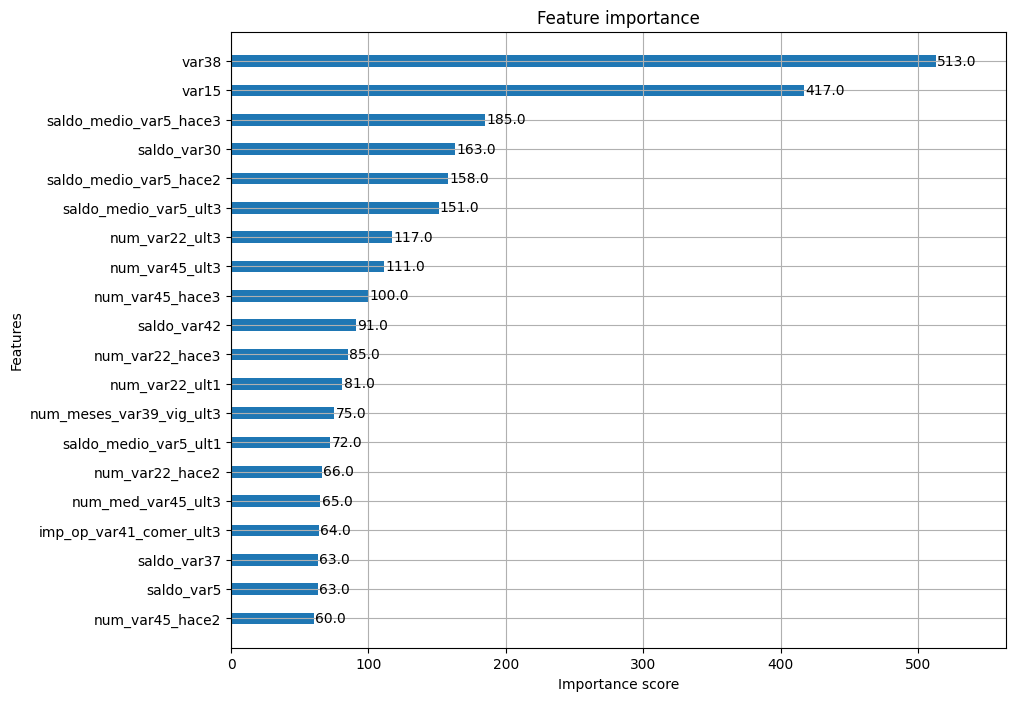

In [23]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=ax,max_num_features=20,height=0.4)

###LightGBM 모델 학습과 하이퍼 파라미터 튜닝

앞과 동일

In [25]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=500,early_stopping_rounds=100,eval_metric='auc')

eval_set=[(X_tr,y_tr),(X_val,y_val)]
lgbm_clf.fit(X_tr,y_tr,eval_set=eval_set)
lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC:{0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.135381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13308
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 242
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training un

XGBoost보다 시간 단축

HyperOpt이용해 아이퍼 파라미터 튜닝

In [30]:
lgbm_search_space={'num_leaves':hp.quniform('num_leaves',32,64,1),
                   'max_depth':hp.quniform('max_depth',100,160,1),
                   'min_child_samples':hp.quniform('min_child_samples',60,100,1),
                   'subsample':hp.uniform('subsample',0.7,1),
                   'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

def objective_func(search_space):
  lgbm_clf=LGBMClassifier(n_estimators=100,
                          num_leaves=int(search_space['num_leaves']),
                          max_depth=int(search_space['max_depth']),
                          min_child_samples=int(search_space['min_child_samples']),
                          subsample=search_space['subsample'],
                          learning_rate=search_space['learning_rate'],
                          early_stopping_rounds=30,eval_metric='auc')




  roc_auc_list=[]
  kf=KFold(n_splits=3)

  for tr_index, val_index in kf.split(X_train):
    X_tr,X_val=X_train.iloc[tr_index],X_train.iloc[val_index]
    y_tr,y_val=y_train.iloc[tr_index],y_train.iloc[val_index]
    lgbm_clf.fit(X_tr,y_tr,eval_set=[(X_tr,y_tr),(X_val,y_val)])
    score=roc_auc_score(y_val,lgbm_clf.predict_proba(X_val)[:,1])
    roc_auc_list.append(score)
  return -1*np.mean(roc_auc_list)

In [31]:
from hyperopt import fmin,tpe,Trials
trials=Trials()
best=fmin(fn=objective_func,space=lgbm_search_space,algo=tpe.suggest,max_evals=50,trials=trials)
print('best:',best)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1579, number of negative: 38965
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12922
[LightGBM] [Info] Number of data points in the train set: 40544, number of used features: 202
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=30, early_stopping_rounds=30 will be ignored. Current value: early_stopping_round=30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038945 -> initscore=-3.205872
[LightGBM] [Info] Start training from score -3.205872
Training until va

In [32]:
lgbm_clf=LGBMClassifier(n_estimators=100,num_leaves=int(best['num_leaves']),
                        max_depth=int(best['max_depth']),
                        min_child_samples=int(best['min_child_samples']),
                        subsample=round(best['subsample'],5),
                        learning_rate=round(best['learning_rate'],5),early_stopping_rounds=100,
                        eval_metric='auc')
lgbm_clf.fit(X_tr,y_tr,eval_set=[(X_tr,y_tr),(X_val,y_val)])
lgbm_roc_score=roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1])
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1658, number of negative: 40913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12992
[LightGBM] [Info] Number of data points in the train set: 42571, number of used features: 200
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.038947 -> initscore=-3.205836
[LightGBM] [Info] Start training from score -3.205836
Training un

###10 분류 실습- 캐글 신용카드 사기 검출

레이블 class속성 매우 불균형한 분포
0: 사기 아닌 정상적 신용카드 트랜잭션 데이터
1: 신용카드 사기

###언더 샘플링과 오버 샘플링의 이해

이상 레이블을 가지는 데이터 건수가 매우 적어 제대로 다양한 유형을 학습하지 못하고 정상 레이블은 데이터 건수가 많아 일방적으로 정상 레이블에 치우친 학습을 수행해 제대로된 이상 데이터 검출이 어려움
* 적절한 학습 데이터 확보 방안
1. 오버 샘플링: 예측 성능 상 유리해 상대적으로 더 많이 사용
> 이상 데이터와 같이 적은 데이터 세트를 증식하여 충분한 데이터를 확보하는 방법/원본 데이터의 피처값들을 아주 약간만 변경하여 증식/방식-SMOTE: 적은 데이터 세트에 있는 개별 데이터들의 K최근접 이웃을 찾아서 이 데이터와 K개 이웃들의 차이를 일정 값으로 만들어서 기존 데이터와 차이나는 새로운 데이터 생성/파이썬 패키지 imbalanced-learn
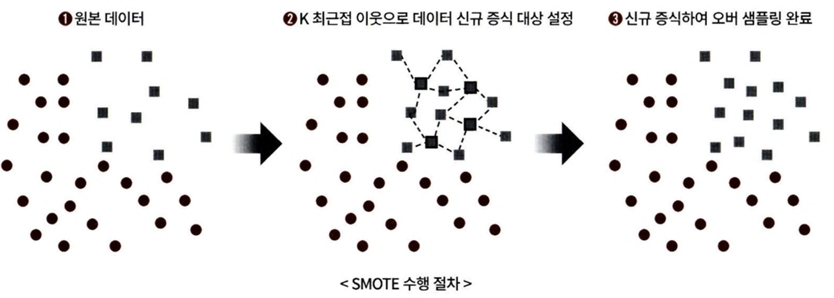

2. 언더 샘플링
> 많은 데이터 세트를 적은 데이터 수준으로 감소시키는 방식/ 너무 많은 데이터 감소시켜 정상 레이블의 경우 제대로 된 학습을 할 수 없는 문제 발생 가능

###데이터 일차 가공 및 모델 학습/예측/평가

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df=pd.read_csv('/content/drive/MyDrive/ESAA/assignment/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


v로 시작하는 피처들의 의미 알 수 없음
TIme피처의 경우 의미 없으므로 제거
Amount: 신용카드 트랜잭션 금액

In [34]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

결측치 없고 피처들은 class레이블 제외 모두 float

다양한 데이터 사전 가공 수행하고 예측성능 비교

DF 가공하여 반환하는 get_preprocessed_df 함수와 데이터 가공 후 학습 테스트 데이터 세트 반환하는 함수 생성

In [48]:
from sklearn.model_selection import train_test_split
def get_preprocessed_df(df=None):
  df_copy=df.copy()
  df_copy.drop('Time',axis=1,inplace=True)
  return df_copy

In [49]:
def get_train_test_dataset(df=None):
  df_copy=get_preprocessed_df(df)

  X_features=df_copy.iloc[:,:-1]
  y_target=df_copy.iloc[:,-1]
  #stratified기반 분할
  X_train,X_test,y_train,y_test=train_test_split(X_features,y_target,test_size=0.3,
                                                 random_state=0,stratify=y_target)
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)

In [37]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape*100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test,pred_proba_c1, pred):
  confusion=confusion_matrix(y_test,pred)
  accuracy=accuracy_score(y_test,pred)
  precision=precision_score(y_test,pred)
  recall=recall_score(y_test,pred)
  f1=f1_score(y_test,pred)
  roc_auc=roc_auc_score(y_test,pred_proba_c1)
  print('오차행렬')
  print(confusion)
  print('정확도:{0:.4f} , 정밀도:{1:.4f} , 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1,roc_auc))

In [50]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba=lr_clf.predict_proba(X_test)[:,1]

get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

오차행렬
[[85282    13]
 [   57    91]]
정확도:0.9992 , 정밀도:0.8750 , 재현율:0.6149, F1:0.7222, AUC:0.9575


모델 변경해 학습하는 함수 생성

In [40]:
def get_model_train_eval(model,ftr_train=None,ftr_test=None,tgt_train=None,tgt_test=None):
  model.fit(ftr_train,tgt_train)
  pred=model.predict(ftr_test)
  pred_proba=model.predict_proba(ftr_test)[:,1]
  get_clf_eval(tgt_test,pred_proba,pred)

본 데이터 세트 극도로 불균형한 레이블 값 분포도 이므로 LGBMClassifier객체 생성 시 boost_from_average=False로 설정해야함

In [41]:
from lightgbm import LGBMClassifier
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

###데이터 분포도 변환 후 모델 학습 예측 평가

왜곡된 분포도를 가지는 데이터를 재가공한 뒤에 모델을 다시 테스트
* 대부분의 선형 모델은 중요 피처들의 값이 정규 분포 형태를 유지하는 것을 선호
* Amount 피처는 신용 카드 사용 금액으로 정상/사기 트랜직션을 결정하는 매우 중요한 속성일 가능성 높음
Amount피처의 분포 확인

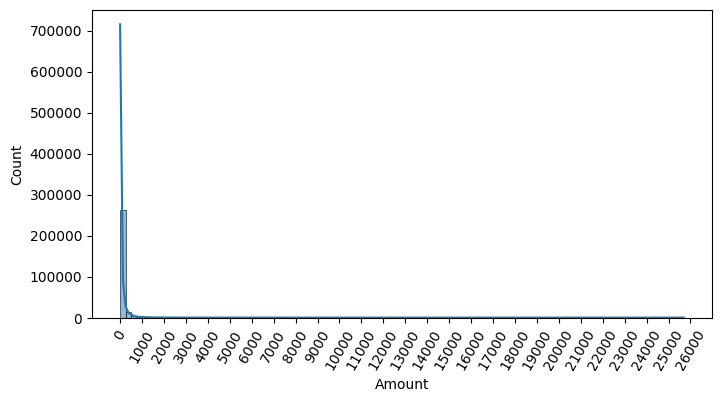

In [42]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000),rotation=60)
sns.histplot(card_df['Amount'],bins=100,kde=True)
plt.show()

카드 사용 금액이 1000불 이하인 데이터가 대부분이며 26,000불까지 드물지만 많은 금액을 사용한 경우가 발생하면서 꼬리가 긴 형태의 분포 곡선을 가짐

표준 정규 분포 형태로 변환한 뒤에 로지스틱 회귀의 예측 성능을 측정(전처리 함수 수정)

In [51]:
from sklearn.preprocessing import StandardScaler
def get_preprocessed_df(df=None):
  df_copy=df.copy()
  scaler=StandardScaler()
  amount_n=scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1))
  #변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame 맨 앞 칼럼으로 입력
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1,inplace=True)
  return df_copy

In [45]:
X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)
print('###로지스틱 회귀 예측 성능###')
lr_clf=LogisticRegression(max_iter=1000)
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

print('###LightGBM 예측 성능')
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

###로지스틱 회귀 예측 성능###
오차행렬
[[85281    14]
 [   55    93]]
정확도:0.9992 , 정밀도:0.8692 , 재현율:0.6284, F1:0.7294, AUC:0.9706
###LightGBM 예측 성능
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

정규 분포 형태로 피처값 변환 후 로지스틱 정밀도와 재현율이 오히려 조금 저하, LightGBM의 경우도 약간 저하되었으나 큰 성능상 변경 없음

로그 변환 수행: 데이터 분포도가 심하게 왜곡되어있을 경우 적용하는 주요 기법 중 하나/큰값을 상대적으로 작은 값으롤 변환하기 때문에 데이터 분포도의 왜곡을 상당 수준 개선

전처리 함수 수정

In [54]:
def get_preprocessed_df(df=None):
  df_copy=df.copy()
  amount_n=np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1,inplace=True)
  return df_copy

In [55]:
X_train, X_test, y_train, y_test=get_train_test_dataset(card_df)

print('###로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('###LightGBM 예측 성능###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

###로지스틱 회귀 예측 성능###
오차행렬
[[85282    13]
 [   59    89]]
정확도:0.9992 , 정밀도:0.8725 , 재현율:0.6014, F1:0.7120, AUC:0.9734
###LightGBM 예측 성능###
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123598 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

로지스틱 회귀의 경우 원본 데이터 대비 정밀도 향상되었으나 재현율 저하

LightGBM의 경우 재현율 향상

레이블이 극도로 불균일한 데이터 세트에서 로지스틱 회귀는 데이터 변환 시 약간은 불안정한 성능 결과를 보여줌

###이상치 데이터 제거 후 모델 학습/예측/평가

이상치 데이터는 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터이며 아웃 라이어라고도 불림

이상치로 인해 머신러닝 모델의 성능에 영향을 받는 경우 발생하기 쉬움

이상치를 찾아내는 방법
1. IQR(Inter Quantile Range)방식
사분위 값의 편차를 이용하는 기법으로 흔히 박스 플롯 방식으로 시각화 가능
* IQR=Q1(25%)~Q3(75%)의 범위
* Q3+IQR*1.5: 최댓값으로 가정
* Q1-IQR*1.5: 최솟값으로 가정

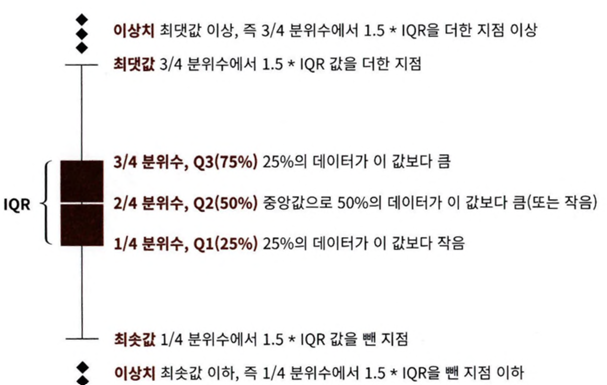

매우 많은 피처가 있을 경우 레이블과 가장 상관성이 높은 피처들을 위주로 이상치를 검출하는 것이 좋음

상관도 구한 후 시각화

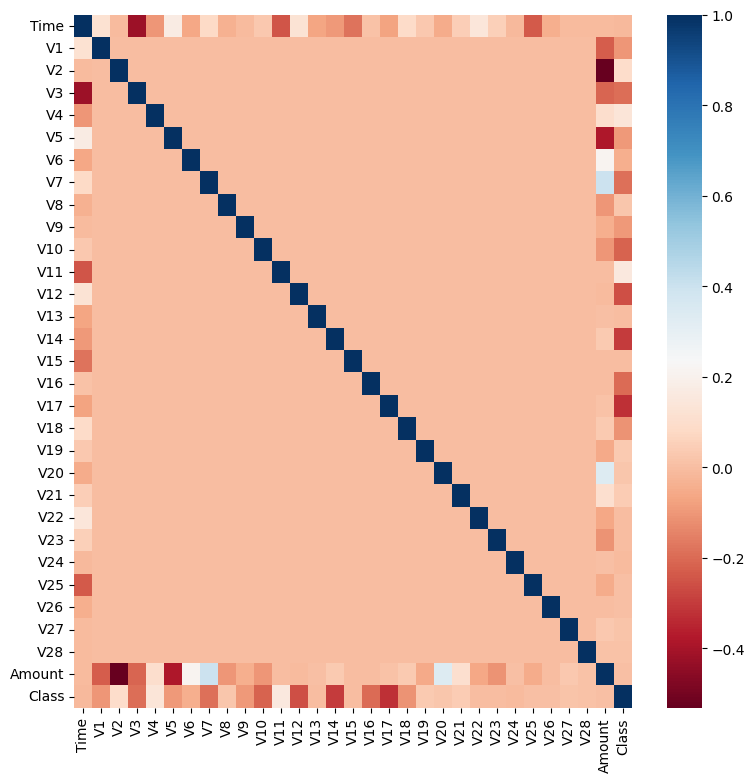

In [56]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr=card_df.corr()
sns.heatmap(corr,cmap='RdBu')
plt.show()

음의 상관관계가 가장 높은 피처: V14, V17

이중 V14에 대해서만 이상치 찾아 제거

get_outlier()함수는 인자로 DF와 이상치를 검출할 칼럼을 입력받음/함수 내에서 넘파이의 percentile()을 이용해 Q1,Q3를 구하고 이에 기반해 IQR계산/1.5곱해 최댓값 최솟값 지점 구한 후 최댓값보다 크거나 최솟값보다 작은 값을 이상치로 설정하고 해당 이상치가 있는 DF Index반환


In [57]:
import numpy as np

def get_outlier(df=None,column=None,weight=1.5):
  fraud=df[df['Class']==1][column]
  quantile_25=np.percentile(fraud.values,25)
  quantile_75=np.percentile(fraud.values,75)
  iqr=quantile_75-quantile_25
  iqr_weight=iqr*weight
  lowest_val=quantile_25-iqr_weight
  highest_val=quantile_75+iqr_weight
  outlier_index=fraud[(fraud<lowest_val)|(fraud>highest_val)].index
  return outlier_index


In [58]:
outlier_index=get_outlier(df=card_df,column='V14',weight=1.5)
print('이상치 데이터 인덱스: ',outlier_index)

이상치 데이터 인덱스:  Index([8296, 8615, 9035, 9252], dtype='int64')


전처리 함수에 get_outlier로 이상치 추출하고 이를 삭제하는 로직 추가 후 두 모델에 다시 적용

In [61]:
def get_preprocessed_df(df=None):
  df_copy=df.copy()
  amount_n=np.log1p(df_copy['Amount'])
  df_copy.insert(0,'Amount_Scaled',amount_n)
  df_copy.drop(['Time','Amount'],axis=1,inplace=True)

  outlier_index=get_outlier(df=df_copy,column='V14',weight=1.5)
  df_copy.drop(outlier_index,axis=0,inplace=True)
  return df_copy

In [62]:
X_train,X_test,y_train,y_test=get_train_test_dataset(card_df)
print('###로지스틱 회귀 예측 성능###')
get_model_train_eval(lr_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

print('###LightGBM 예측 성능###')
get_model_train_eval(lgbm_clf,ftr_train=X_train,ftr_test=X_test,tgt_train=y_train,tgt_test=y_test)

###로지스틱 회귀 예측 성능###
오차행렬
[[85280    15]
 [   48    98]]
정확도:0.9993 , 정밀도:0.8673 , 재현율:0.6712, F1:0.7568, AUC:0.9725
###LightGBM 예측 성능###
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

두 모델 모두 예측 성능 크게 향상

###SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

SMOTE 오버 샘플링을 적용한 뒤 로지스틱 회귀와 LightGBM 모델의 예측 성능 평가

* 반드시 학습 데이터 세트에서만 오버 샘플링 해야 함(검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링 할 경우 원본 데이터 세트가 아닌 데이터 세트에서 검증 또는 테스트를 수행하기 때문에 올바른 검증/테스트가 될 수 없음

데이터 증식 전후 비교

In [63]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=0)
X_train_over, y_train_over=smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:',X_train.shape,y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ',X_train_over.shape,y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (199362, 29) (199362,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 Class
0    199020
1    199020
Name: count, dtype: int64


이를 기반으로 로지스틱 모델 성능 평가

In [64]:
lr_clf=LogisticRegression()
get_model_train_eval(lr_clf,ftr_train=X_train_over,ftr_test=X_test,tgt_train=y_train_over,tgt_test=y_test)

오차행렬
[[82933  2362]
 [   11   135]]
정확도:0.9722 , 정밀도:0.0541 , 재현율:0.9247, F1:0.1022, AUC:0.9736


재현율 크게 증가했으나 정밀도 5.4%로 급락> 사용불가
> 실제 원본 데이터의 유형보다 너무나 많은 Class=1데이터를 학습하면서 실제 테스트 데이터 세트에서 예측을 지나치게 Class=1으로 적용해 정밀도가 떨어진 것

분류 결정 입곗값에 따른 정밀도와 재현율 곡선을 통해 SMOTE로 학습된 로지스틱 회귀 모델에 어떤 문제가 발생하고 있는지 시각화

In [67]:
from sklearn.metrics import precision_recall_curve
def precision_recall_curve_plot(y_test,pred_proba_c1):
  precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boundary=thresholds.shape[0]
  plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
  plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

  start, end=plt.xlim()
  plt.xticks(np.round(np.arange(start,end,0.1),2))

  plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
  plt.legend(); plt.grid()
  plt.show()

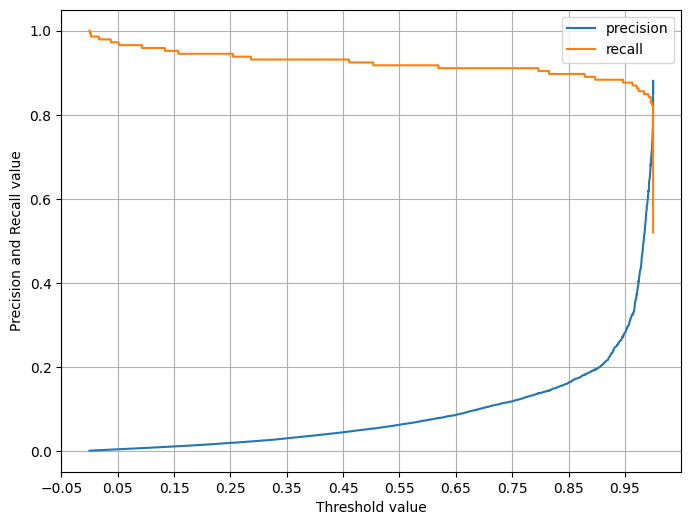

In [68]:
precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])

0.99이하에서 재현율이 매우 좋고 정밀도가 극단적으로 낮다가 0.99 이상에서 반대로 재현율이 대폭 떨어지고 정밀도가 높아짐. 분류 결정 입계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모델의 경우 SMOTE 적용 후 올바른 예측모델이 생성되지 못함

LightGBM:

In [70]:
lgbm_clf=LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,boost_from_average=False)
get_model_train_eval(lgbm_clf,ftr_train=X_train_over,ftr_test=X_test,tgt_train=y_train_over,tgt_test=y_test)

[LightGBM] [Info] Number of positive: 199020, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.131348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398040, number of used features: 29
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

이상치만 제거한 경우보다 재현율이 더 높아졌으나 정밀도는 낮아짐

> SMOTE를 적용하면 재현율은 높아지나 정밀도는 낮아지는 것이 일반적이므로 정밀도보다 재현율 지표를 높이는 것이 머신러닝 모델의 주요한 목표라면 SMOTE를 적용하면 좋음

결과 정리
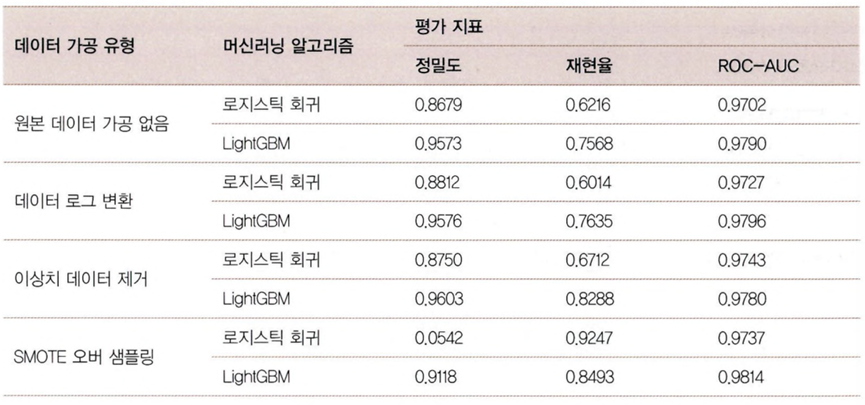